In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotting style 
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

First dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

Second dataset: https://data.mendeley.com/datasets/dzz48mvjht/1/files/e4a4a2de-2783-4ea8-9958-0fc3c82cadd4

In [350]:
# Load in Cleveland patient database
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [351]:
print(f"Dimensions of the X matrix: {X.shape}")
print(f"Dimensions of the y matrix: {y.shape}")

Dimensions of the X matrix: (303, 13)
Dimensions of the y matrix: (303, 1)


In [352]:
# combine the X and y into a singular dataframe for first dataset.
df1 = pd.concat([X, y], axis = 1)

In [353]:
# read in Switzerland patient database
df2 = pd.read_csv("switzerland_dataset.csv")

In [354]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [355]:
df2 = df2.replace("?", np.nan)

In [356]:
# Combine the two datasets
df = pd.concat([df1 , df2], axis= 0, ignore_index= True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [357]:
print(f"dimensions of the dataset: {df.shape}")

dimensions of the dataset: (426, 14)


In [358]:
print(f"Number of unique values num (target variable) takes: {df["num"].nunique()}")
print(f"Values that num (target variable) takes: {df["num"].unique()}")

Number of unique values num (target variable) takes: 5
Values that num (target variable) takes: [0 2 1 3 4]


### Description of num variable for Datasets:

Value 0: No vessels with >50% diameter narrowing (absence of significant disease) 

Value 1: 1 major vessel with >50% diameter narrowing

Value 2: 2 major vessels with >50% diameter narrowing

Value 3: 3 major vessels with >50% diameter narrowing

Value 4: 4 major vessels with >50% diameter narrowing


Source:
"Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)"   - UCI Irvine webpage : https://archive.ics.uci.edu/dataset/45/heart+disease

In [359]:
# I will be encoding values 1-4 of the num variable as "1", as all of these values signify heart risk as at least 1 major vessel is > %50 diameter narrowing

# Ecode target variable as 0 or 1
df["target"] = np.where(df["num"].isin([1, 2, 3, 4]), 1, 0)

df = df.drop("num", axis = 1)


### Quick first look at full dataset

In [360]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [361]:
print(f"number of duplicates : {df.duplicated().sum()}")

number of duplicates : 0


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       426 non-null    int64 
 1   sex       426 non-null    int64 
 2   cp        426 non-null    int64 
 3   trestbps  424 non-null    object
 4   chol      426 non-null    int64 
 5   fbs       351 non-null    object
 6   restecg   425 non-null    object
 7   thalach   425 non-null    object
 8   exang     425 non-null    object
 9   oldpeak   420 non-null    object
 10  slope     409 non-null    object
 11  ca        304 non-null    object
 12  thal      372 non-null    object
 13  target    426 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 46.7+ KB


In [363]:
df.describe(include = "all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,426.000000,426.000000,426.000000,424.0,426.000000,351.0,425.0,425.0,425.0,420.0,409.0,304.0,372.0,426.000000
unique,NaN,NaN,NaN,70.0,NaN,4.0,6.0,158.0,4.0,75.0,6.0,6.0,6.0,NaN
top,NaN,NaN,NaN,120.0,NaN,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,NaN
freq,NaN,NaN,NaN,37.0,NaN,258.0,151.0,11.0,204.0,99.0,142.0,176.0,166.0,NaN
mean,54.692488,0.748826,3.314554,NaN,175.464789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596244
std,9.034928,0.434198,0.922719,NaN,120.135100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491227
min,29.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,48.250000,0.250000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,56.000000,1.000000,4.000000,NaN,217.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,61.000000,1.000000,4.000000,NaN,260.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### Preprocessing steps

In [364]:
# datatype conversions:
# To numeric
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for var in numeric_cols:
    df[var] = pd.to_numeric(df[var], errors = "coerce")

# to categorical
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

for var in categorical_cols:
    df[var] = pd.to_numeric(df[var], errors = "coerce").astype("Int64")

    df[var] = df[var].astype("category")

df = df.convert_dtypes()

df.dtypes

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak      Float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [365]:
df[numeric_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,426.0,424.0,426.0,425.0,420.0
mean,54.692488,131.266509,175.464789,141.555294,0.932143
std,9.034928,19.130316,120.1351,26.957118,1.144725
min,29.0,80.0,0.0,60.0,-2.6
25%,48.25,120.0,0.0,122.0,0.0
50%,56.0,130.0,217.5,145.0,0.6
75%,61.0,140.0,260.75,162.0,1.6
max,77.0,200.0,564.0,202.0,6.2


In [366]:
# Categorical varible counts
print("categorical variable counts:")

df[categorical_cols].describe()

categorical variable counts:


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,426,426,351,425,425,409,304,372,426
unique,2,4,2,3,2,3,4,3,2
top,1,4,0,0,0,2,0,3,1
freq,319,242,301,236,272,201,176,185,254


### There are 14 variables total in the dataset

- Age is an quantitive integer variable measured in year 

- Sex is a categorical variable taking on values 0 for Female and 1 for Male

- cp is a categorical variable with 4 levels, signifying chest pain type chest: 
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

- trestbps is an quantitative integer variable denoting resting blood pressure when the patient was admitted to the hospital in mm Hg

- chol is an quantitive integer variable denoting serum cholestoral in mg/dl

- fbs is a binary categorical variable, taking value 1 if fasting blood sugar > 120 mg/dl and 0 otherwise

- restecg is a categorical variable depicting resting electrocardiographic results: 
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach is an integer quantitative variable depicting maximum heart rate achieved

- exang is a binary categorical variable denoting exercise induced angina (1 = yes; 0 = no)

- oldpeak is a quantitative float variable denoting ST depression induced by exercise relative to rest, measured in mm. Simply put, Oldpeak measures how much your heart's electrical signal "drops" during exercise compared to when you're resting. Higher values are more concerning as it suggests your heart is having trouble getting oxygen when exercising. 

- slope is a integer categorical variable which depicts the slope of the peak exercise ST segment:
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

- ca is a integer categorical variable represting the number of major vessels covered by flourospy. Takes values 0 to 3.

- thal is a categorical integer variable taking values: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect. Values 6 and 7 are where the concern is as it shows blockage of blood flow during exertion (exercise, that sort of thing).

- Target is a integer categorical variable of interest, where 1 = diagnosis of heart disease, 0 = no diagnosis of heart disease.


## EDA

In [367]:
print("Basic statistics for numeric data:")
df.describe()

Basic statistics for numeric data:


,age,trestbps,chol,thalach,oldpeak
count,426.0,424.0,426.0,425.0,420.0
mean,54.692488,131.266509,175.464789,141.555294,0.932143
std,9.034928,19.130316,120.1351,26.957118,1.144725
min,29.0,80.0,0.0,60.0,-2.6
25%,48.25,120.0,0.0,122.0,0.0
50%,56.0,130.0,217.5,145.0,0.6
75%,61.0,140.0,260.75,162.0,1.6
max,77.0,200.0,564.0,202.0,6.2


##### I notice that the Chol 25 percent quantile is 0, which is quite strange. This is not normal, so I will explore whether or not 0 was used for the patients cholesterol if it wasn't measured. 

In [368]:
chol_zero_count = len(df[df["chol"] == 0])

print(f"The number of rows with cholesterol 0 value: {chol_zero_count}")

The number of rows with cholesterol 0 value: 123


In [369]:
df["chol"] = df["chol"].apply(lambda x: np.nan if x == 0 else x)

In [370]:
print("descriptive statistics for chol column")
df["chol"].describe()

descriptive statistics for chol column


count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

### Distribution of target variable

In [371]:
print(f"Heart Disease Prevalence Percentage: {round(((df["target"] == 1).sum() / len(df)) * 100, 3)}%")

Heart Disease Prevalence Percentage: 59.624%


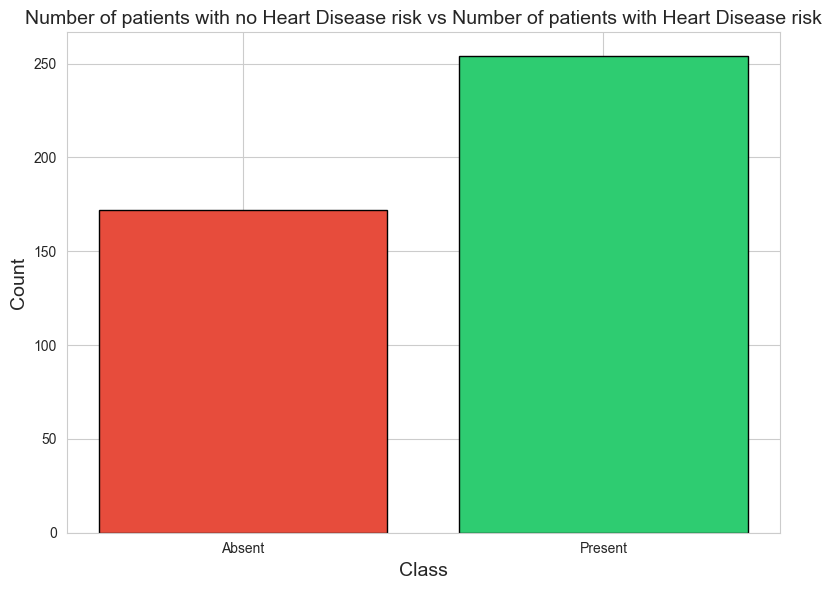

In [372]:
target_series = df["target"].astype(int)

target_values = target_series.value_counts()

plt.bar(x = target_values.index, height = target_values.values,
            color=['#2ecc71', '#e74c3c'],
            edgecolor='black')

plt.title("Number of patients with no Heart Disease risk vs Number of patients with Heart Disease risk", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xlabel("Class", fontsize = 14)
plt.xticks([0,1], ["Absent", "Present"])
plt.tight_layout()

### Distribution of Quantitative variables

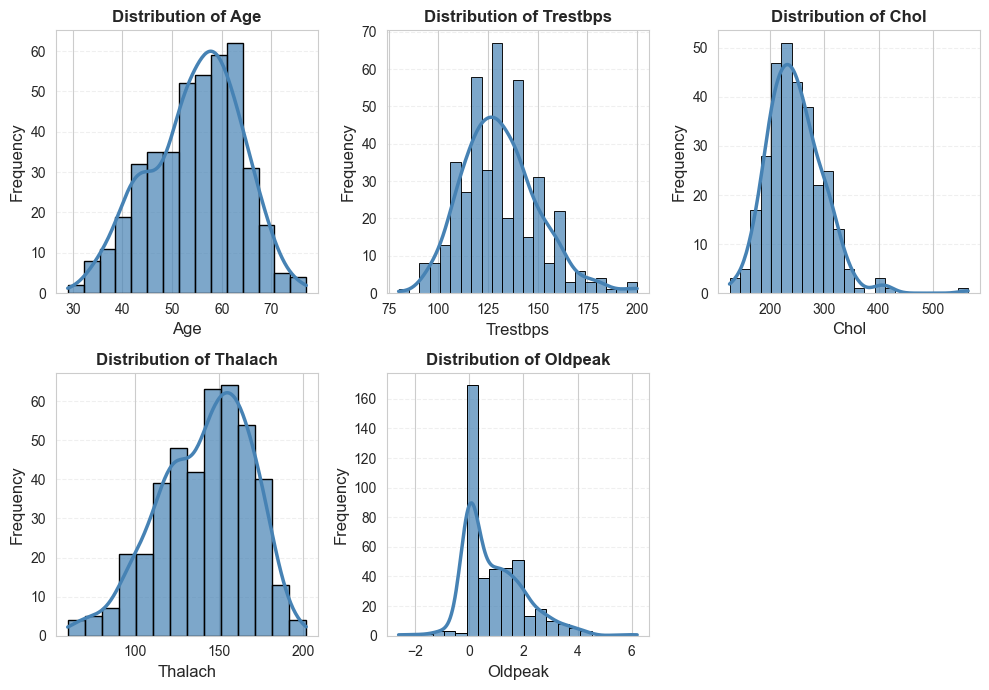

In [373]:
def hist(dataframe):
    fig, axs = plt.subplots(2, 3, figsize = (10, 7))

    axs = axs.flatten()

    for i, var in enumerate(numeric_cols):
            sns.histplot(x = var, data = dataframe, 
                        kde = True, 
                        line_kws= {"linewidth" : 2.5}, 
                        color = "steelblue",
                        edgecolor = "black",
                        alpha = 0.7,
                        ax = axs[i])
            axs[i].set_title(f"Distribution of {var.capitalize()}", fontsize = 12, fontweight = "bold")
            axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
            axs[i].set_ylabel("Frequency", fontsize = 12)
            axs[i].grid(axis = "y", alpha = 0.3, linestyle = "--")

    fig.delaxes(axs[5])
    plt.tight_layout()
    plt.show()

hist(df)

- Chol is approximately normally distributed in this dataset.

- Oldpeak has a large peak at around value 0, suggesting most patients in the dataset do not have trouble with blood flow to the heart after exercising.

### Frequency of categorical variables between the affected class and the unaffected class

In [437]:
def category_histplot(df):
    categorical_cols_minusTarget = categorical_cols.copy()
    
    categorical_cols_minusTarget.remove("target")

    fig, axs = plt.subplots(3, 3, figsize = (10, 8))

    axs = axs.flatten()

    for i, var in enumerate(categorical_cols_minusTarget):
        sns.histplot(x = var, 
                data = df, 
                hue = "target",
                multiple = "stack",
                discrete= True,
                edgecolor = "black", 
                palette={0: '#3498db', 1: '#e74c3c'},
                ax = axs[i])
        
        for container in axs[i].containers:
            axs[i].bar_label(container, fmt = "%d", label_type = "edge", fontsize = 7)

        unique_vals = sorted(df[var].dropna().unique())
        axs[i].set_xticks(unique_vals)
        axs[i].set_xticklabels(unique_vals)

        axs[i].set_title(f"Distribution of {var.capitalize()} by Target", fontsize = 12, fontweight = "bold")
        axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
        axs[i].set_ylabel(f"Count", fontsize = 12)
        axs[i].legend(labels=["Disease", "No Disease"], 
                      title="Target", 
                      fontsize=6)


    fig.delaxes(axs[8])
    plt.tight_layout()
    plt.show()

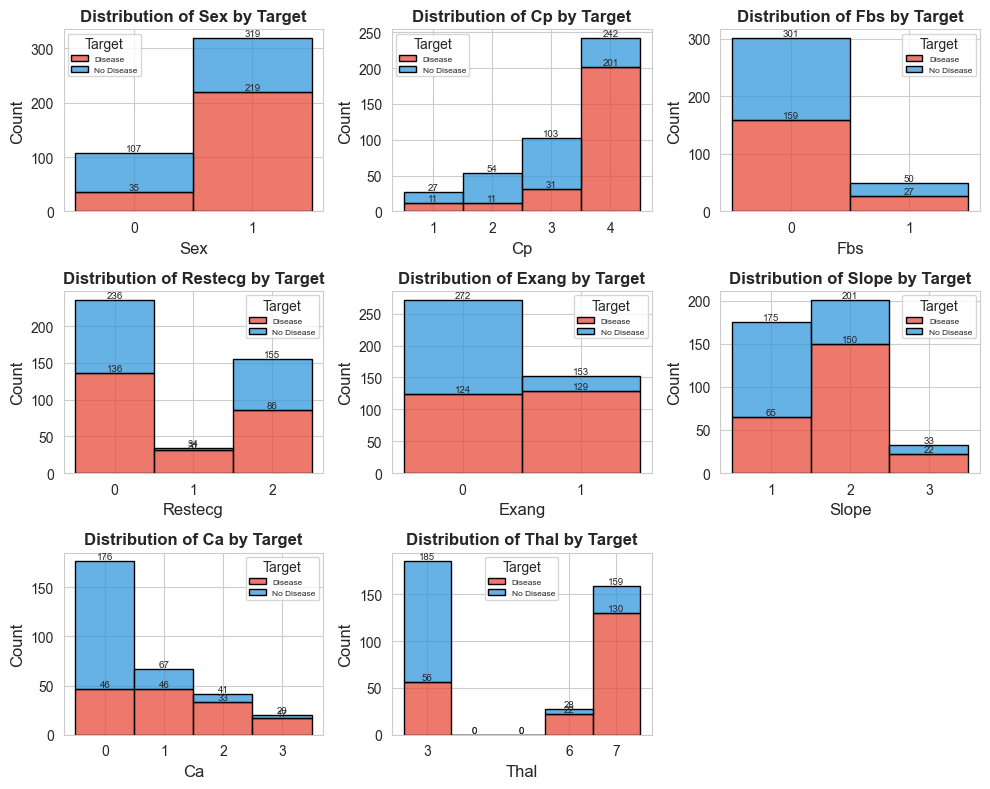

In [438]:
category_histplot(df)

In [427]:
# def category_barplot(df):
#     categorical_cols_minusTarget = categorical_cols.copy()
    
#     categorical_cols_minusTarget.remove("target")

#     fig, axs = plt.subplots(3, 3, figsize = (10, 8))

#     axs = axs.flatten()

#     for i, var in enumerate(categorical_cols_minusTarget):
#         sns.countplot(x = var, 
#                 data = df, 
#                 hue = "target",
#                 edgecolor = "black", 
#                 ax = axs[i])
#         axs[i].set_title(f"Distribution of {var.capitalize()} by Target", fontsize = 12, fontweight = "bold")
#         axs[i].set_xlabel(f"{var.capitalize()}", fontsize = 12)
#         axs[i].set_ylabel(f"Count", fontsize = 12)
#         axs[i].legend(title = "Target", labels = ["No Disease", "Disease"], fontsize = 6)

#     fig.delaxes(axs[8])
#     plt.tight_layout()
#     plt.show()

### Missingness

In [88]:
print("number of missing values per column")
df.isna().sum()

number of missing values per column


age                0
sex                0
cp                 0
trestbps           2
chol             123
fbs               75
restecg            1
thalach            1
exang              1
oldpeak            6
slope             17
ca               122
thal              54
target             0
ca_missing         0
fbs_missing        0
slope_missing      0
thal_missing       0
dtype: int64

In [89]:
ca_percent_missing = round((df["ca"].isna().sum()) / len(df), 3)
chol_percent_missing = round(df["chol"].isna().sum() / len(df), 3)

print(f"Percent missing for chol column: {chol_percent_missing}")
print(f"Percent missing for ca column: {ca_percent_missing}")

Percent missing for chol column: 0.289
Percent missing for ca column: 0.286


Missing values most prevalent in "ca" column

Text(70.72222222222221, 0.5, 'Row index')

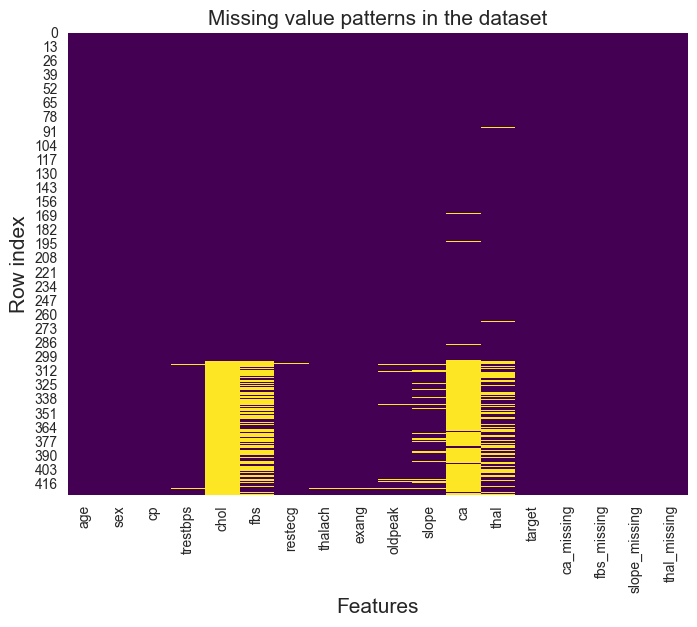

In [87]:
missing_data_mask = df.isna()

sns.heatmap(missing_data_mask, cbar = False, cmap = "viridis")
plt.title("Missing value patterns in the dataset", fontsize = 15)
plt.xlabel("Features", fontsize = 15)
plt.ylabel("Row index", fontsize = 15)

##### Majority of the missing data is coming from the Switzerland dataset. Data is very likely MNAR. For example, the ca which represents the number of major vessels covered by flourospy requires X-ray procedures in order to test whether your arteries are healthy with good blood flow. The procedure is costly to do and cannot be done on every patient. The decision to do cardiac catherization depends is directly related to the patients suspected heart disease severity. 

##### Other variables with many missing values are also very likely MNAR, such as slope, thal. fbs is likely MNAR as well since it requires the patient to be fasted in order to obtain the results which suggests this hospital in Switzerland covers different patters than the cleveland one, especially for requiring patients to be fasted.

##### All of the missing data for the chol variable comes from the switzerland dataset.

In [62]:
# Since the 4 main variables with a majority of the missing values are likely missing not at random, I want to create an indicator where 1 denotes the value for that column
# is missing and 0 otherwise

df["ca_missing"] = df["ca"].isna().astype(int)

df["fbs_missing"] = df["fbs"].isna().astype(int)

df["slope_missing"] = df["slope"].isna().astype(int)

df["thal_missing"] = df["thal"].isna().astype(int)

In [63]:
min_age  = df["age"].min()

max_age = df["age"].max()

age_range = max_age - min_age

print(f"Minimum age in the dataset: {min_age}\n")
print(f"Maximum age in the dataset: {max_age}\n")

Minimum age in the dataset: 29

Maximum age in the dataset: 77



In [64]:
print(f"Range of age in the dataset: {age_range}")

Range of age in the dataset: 48


### Pair-plots

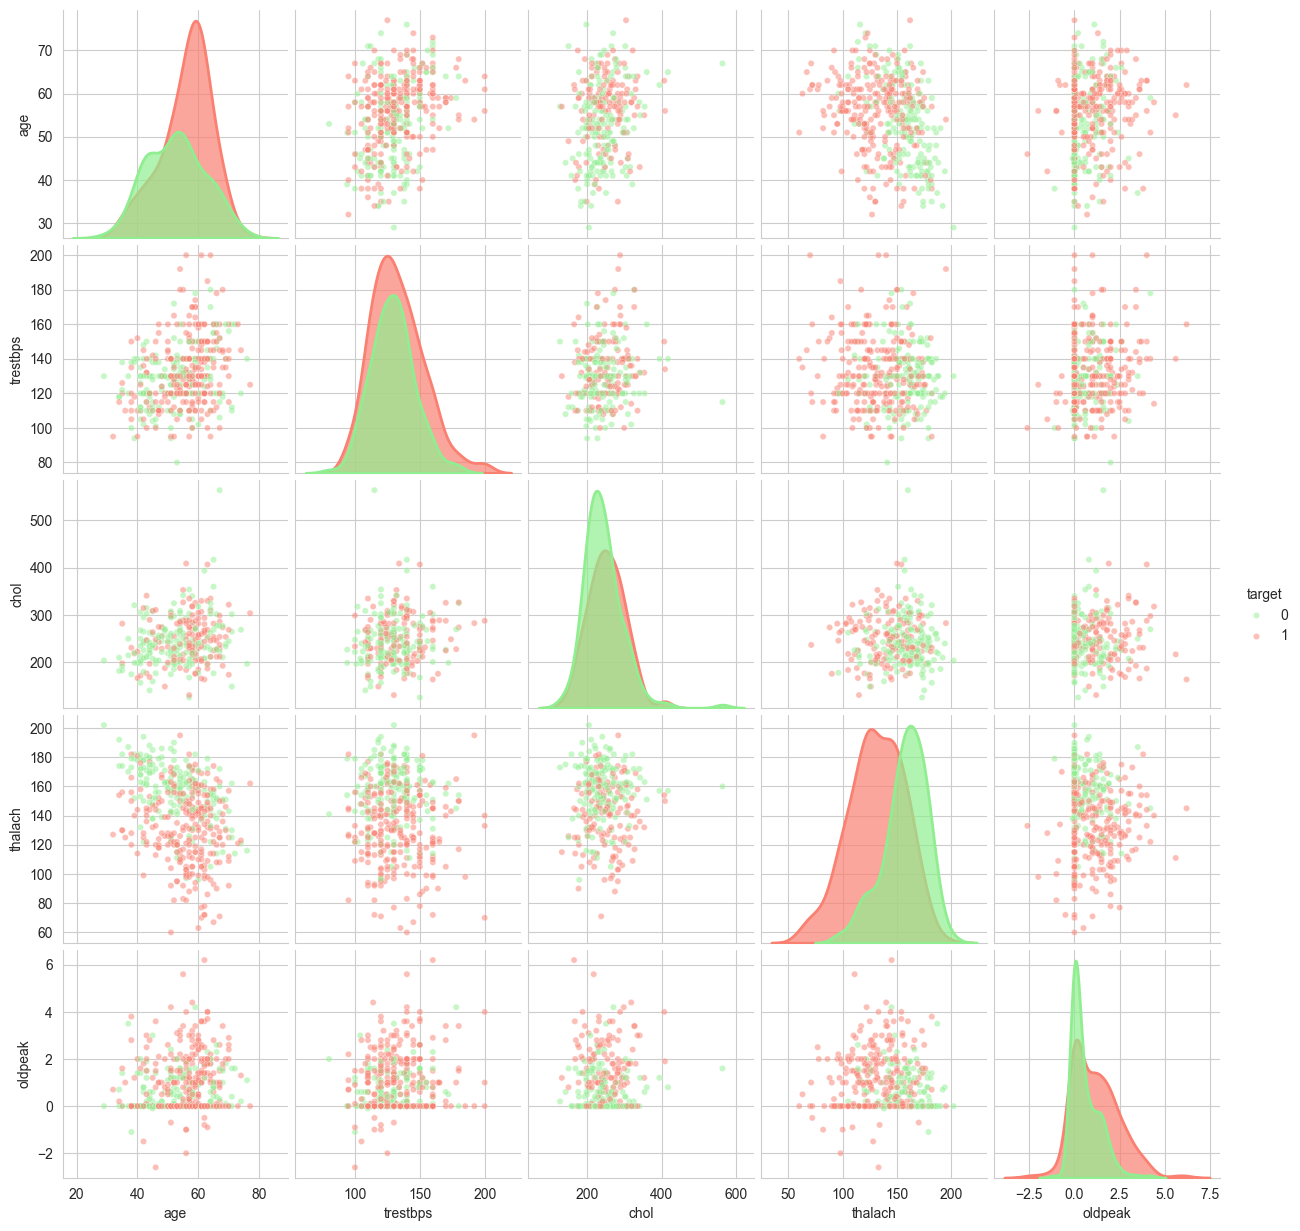

In [94]:
numerical_features = ["age", "trestbps", "chol", "thalach",	"oldpeak"]
sns.pairplot(data = df[numerical_features + ["target"]],
            hue = "target",
            diag_kind = "kde",
            palette = {0: "lightgreen", 1 : "salmon"},
            plot_kws={'alpha': 0.5, 's': 20},
            diag_kws={'alpha': 0.7, 'linewidth': 2}
            )

### Correlation Heatmap

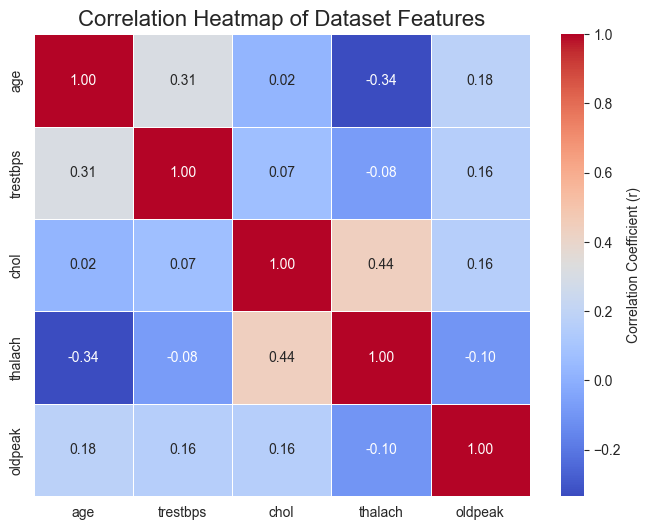

In [66]:
corr_matrix_subset = df[numerical_features].corr()

sns.heatmap(
    corr_matrix_subset,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'} 
)

plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.show()

In [67]:
# Save original data with missing values
df.to_csv('heart_disease_original.csv', index=False)

### Simple imputations

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def simple_imputation(df):
    """
    Simple imputation: Mode for categorical, Median for numeric
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataframe with missing values
        
    Returns:
    --------
    df_imputed : pd.DataFrame
        Dataframe with imputed values
    """
    df_imputed = df.copy()
    
    # Get columns to impute (exclude target and missingness indicators)
    exclude_cols = ['target', 'ca_missing', 'fbs_missing', 'slope_missing', 'thal_missing']
    
    # Impute categorical with mode
    cat_cols = df_imputed.select_dtypes(include=['category']).columns
    for col in cat_cols:
        if col not in exclude_cols and df_imputed[col].isna().any():
            mode_val = df_imputed[col].mode()[0]
            df_imputed[col] = df_imputed[col].fillna(mode_val)
    
    # Impute numeric with median
    num_cols = df_imputed.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df_imputed[col].isna().any():
            median_val = df_imputed[col].median()
            df_imputed[col] = df_imputed[col].fillna(median_val)
    
    print(f"Simple imputation complete. Missing values: {df_imputed.isna().sum().sum()}")
    return df_imputed

In [69]:
df_simple = simple_imputation(df)

Simple imputation complete. Missing values: 0


In [70]:
df_simple.to_csv("heart_disease_simple_imputation.csv")

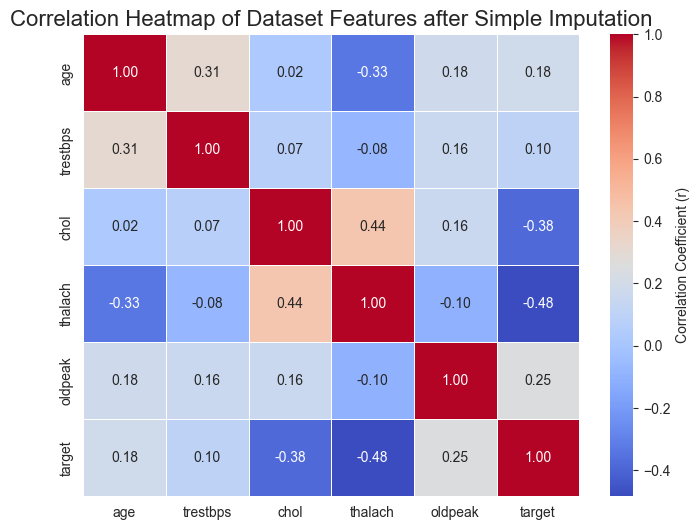

In [71]:
corr_matrix_subset = df_simple[numerical_features + ["target"]].corr()

sns.heatmap(
    corr_matrix_subset,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'} 
)

plt.title('Correlation Heatmap of Dataset Features after Simple Imputation', fontsize=16)
plt.show()

### Multiple imputation with patterns

In [72]:
def multiple_imputation(df, n_datasets=5):
    """
    Multiple imputation using IterativeImputer (MICE)
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataframe with missing values
    n_datasets : int
        Number of imputed datasets to create
        
    Returns:
    --------
    imputed_datasets : list of pd.DataFrames
        List of complete imputed datasets
    """
    # Exclude target and missingness indicators
    exclude_cols = ['target', 'ca_missing', 'fbs_missing', 'slope_missing', 'thal_missing']
    
    # Convert categorical to numeric codes for imputation
    df_numeric = df.copy()
    cat_mappings = {}
    cat_cols = df.select_dtypes(include=['category']).columns
    
    for col in cat_cols:
        if col not in exclude_cols:
            cat_mappings[col] = {i: val for i, val in enumerate(df_numeric[col].dropna().unique())}
            df_numeric[col] = pd.Categorical(df_numeric[col]).codes
            df_numeric[col] = df_numeric[col].replace(-1, np.nan)
    
    # Get columns for imputation
    impute_cols = [col for col in df_numeric.columns if col not in exclude_cols]
    
    # Create multiple imputed datasets
    imputed_datasets = []
    imputer = IterativeImputer(max_iter=10, random_state=0)
    
    for i in range(n_datasets):
        imputer.random_state = i
        imputed_values = imputer.fit_transform(df_numeric[impute_cols])
        
        df_imputed = pd.DataFrame(imputed_values, columns=impute_cols, index=df.index)
        
        # Convert categorical back
        for col in cat_mappings:
            if col in df_imputed.columns:
                df_imputed[col] = df_imputed[col].round().astype(int)
                max_code = len(cat_mappings[col]) - 1
                df_imputed[col] = df_imputed[col].clip(0, max_code)
                df_imputed[col] = df_imputed[col].map(cat_mappings[col]).astype('category')
        
        # Add back excluded columns
        for col in exclude_cols:
            if col in df.columns:
                df_imputed[col] = df[col]
        
        imputed_datasets.append(df_imputed)
    
    print(f"✓ Created {n_datasets} imputed datasets using MICE")
    return imputed_datasets


In [73]:
mi_datasets = multiple_imputation(df, n_datasets=5)

✓ Created 5 imputed datasets using MICE


In [74]:
# Average numeric columns, take mode for categorical columns
df_mi_pooled = mi_datasets[0].copy()

# For numeric columns: average across all 5 datasets
numeric_cols = df_mi_pooled.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    all_values = np.array([dataset[col] for dataset in mi_datasets])
    df_mi_pooled[col] = np.mean(all_values, axis=0)

# For categorical columns: take mode across all 5 datasets
cat_cols = df_mi_pooled.select_dtypes(include=['category']).columns
for col in cat_cols:
    for idx in df_mi_pooled.index:
        values = [dataset.loc[idx, col] for dataset in mi_datasets]
        df_mi_pooled.loc[idx, col] = pd.Series(values).mode()[0]

print(f"✓ Pooled dataset created. Missing: {df_mi_pooled.isna().sum().sum()}")

✓ Pooled dataset created. Missing: 0


In [75]:
df_mi_pooled.to_csv("heart_disease_multiple_imputation.csv")

##### Correlation Heatmap after imputing with MICE Technique

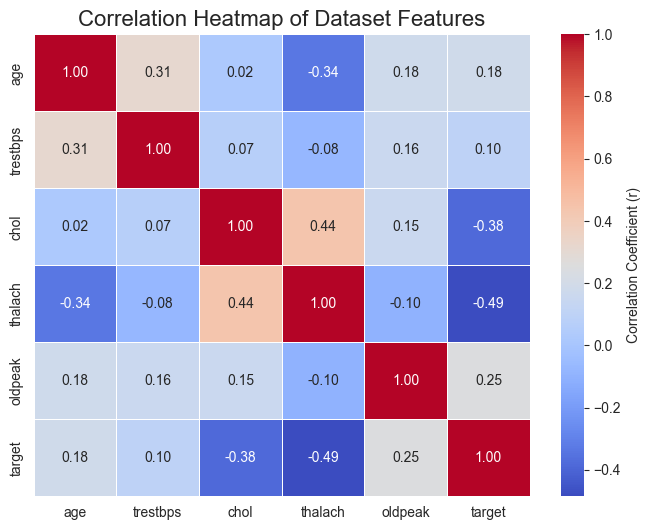

In [76]:
corr_matrix_subset = df_mi_pooled[numerical_features + ["target"]].corr()

sns.heatmap(
    corr_matrix_subset,
    annot=True,        
    cmap='coolwarm',    
    fmt='.2f',        
    linewidths=.5,      
    cbar_kws={'label': 'Correlation Coefficient (r)'} 
)

plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.show()